<a href="https://colab.research.google.com/github/dhrisandamedhi/Online_Retail_segmentation/blob/main/Online_Retail_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name -**Online Retail Segmentation**

##### **Project Type**    - Unsupervised  Learning

---


##### **Contribution**    - Individual

---


##### **Member  - Dhrisanda Medhi**

---



#**Project Summary** -

Write the summary here within 500-600 words.

In this project, our task was to identify major customer segments on a transnational data set that contained one-year historical transactions for a UK-based online retail store. This would help the company segregate its customers based on transaction data and help them in marketing decisions and strategy.

After basic exploration and cleaning the data we found relationships between features in EDA and then jumped into the analysis part. RFM analysis helped us to identify the best Customers who brings more profit for the Online retail stores .

We implemented various unsupervised machine learning algorithm such as KMeans Clustering,  Hierarchical Clustering(Agglomerative Clustering). Here to find the Optimal number of clusters we used Elbow method as well as used a Elbow Visulizers by Yellow bricks from Scikit Learn library. Also we used Silhouette Score and Silhouette Plot to visualize the clusters with different number of clusters. For Agglomerative Clustering we used Dendogram to find the optimal number of clusters.

#**GitHub Link** -

Provide your GitHub Link here.

#**Problem Statement**

**Write Problem Statement Here.**

Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other. The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.



In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Business Goal:
To segement the Customers based on RFM so that the company can target its customers efficiently.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [388]:
# importing all libraries required in the dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import datetime as dt
import scipy
import scipy.stats as stats
import seaborn as sns
import missingno as msno

### Dataset Loading

In [389]:
# Mounting google colab drive to get access of the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [390]:
# Reading data
data=pd.read_csv('/content/drive/MyDrive/Online retail customer segmentation/Online Retail.xlsx - Online Retail.csv')

### Dataset Rows & Columns count

In [391]:
#check data frame shape 
data.shape

(541909, 8)

### Dataset First View

In [392]:
# Cheking the dataset fromation or shape of the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [393]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


### Dataset Information

In [394]:
#checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## ***2. Understanding Your Variables***

In [395]:
# Dataset Columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [396]:
# Dataset Describe
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


###Variables Description

Answer Here

**1. InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

**2. StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**3. Description**: Product (item) name. Nominal.

**4. Quantity**: The quantities of each product (item) per transaction. Numeric.

**5. InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**6. UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**7. CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**8. Country**: Country name. Nominal, the name of the country where each customer resides

### Check Unique Values for each variable.

In [397]:
# Check Unique Values for each variable.
data['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [398]:
data['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [399]:
data['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [400]:
data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [401]:
data['InvoiceDate'].unique()

array(['12/1/10 8:26', '12/1/10 8:28', '12/1/10 8:34', ...,
       '12/9/11 12:31', '12/9/11 12:49', '12/9/11 12:50'], dtype=object)

In [402]:
data['UnitPrice'].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69])

In [403]:
data['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [404]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## ***3.Data Wrangling***

### Data Wrangling Code

#### Duplicate Values

In [405]:
data.duplicated().sum()

5268

In [406]:
#drop duplicate
data.drop_duplicates( inplace=True)

In [407]:
# Missing Values/Null Values Count
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

<Axes: >

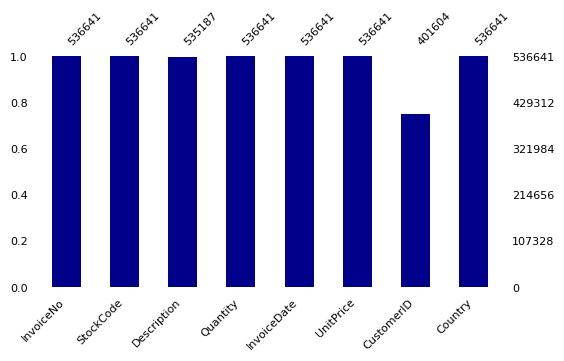

In [408]:
# Visualizing the missing values
msno.bar(data, figsize=(6,3), fontsize=8, color="darkblue")

###What did you know about your dataset?

Answer Here:

###Replace nan to 0

In [409]:
#Replace nan to 0
data=data.fillna(0)

In [410]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

###Converting object to int

In [411]:
# code for change float into integer 
data['CustomerID']= data['CustomerID'].astype(int)

###Coverting InvoiceNo obj  to str

In [412]:
data['InvoiceNo']= data['InvoiceNo'].astype(str)

###Converting object to datetime

In [413]:
# code for changing format of date from object to datetime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
print("Minimum Invoice Date", min(data["InvoiceDate"]))
print("Maximum Invoice Date", max(data["InvoiceDate"]))

Minimum Invoice Date 2010-12-01 08:26:00
Maximum Invoice Date 2011-12-09 12:50:00


##***4.Data Preparation and EDA***


Since the customer ID's are missing, I assume these orders were not made by the customers already in the data set because those customers already have ID's. I also don't want to assign these orders to those customers because this would alter the insights I draw from the data. Instead of dropping the null CustomerID values which amounts to ~25% of data, let's assign those rows a unique customer ID per order using InvoiceNo. This will act as a new customer for each unique order.

Check if InvoiceNo has unique mapping with Customer ID so that each InvoiceNo corresponding to Null CustomerID can be assigned as New Customer.

On sorting descending, this data shows that each Invoice relates to maximum of 1 Customer

Creating NewID column and Assigning to InvoiceNo wherever CustomerID is null

In [414]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


###Cancellation

Adding cancellations column based on definition that InvoiceNo starts with C

In [415]:
data["cancellations"] = np.where(data["InvoiceNo"].str.startswith('C'), 1,0)
total_data = data["InvoiceNo"].shape[0]
cancelled_data = data[data.cancellations == 1].shape[0]
print("Number of cancelled products data", cancelled_data, cancelled_data*100/total_data, "\n")

print(data[data.cancellations == 1]["Quantity"].describe())

#### Removing cancellations since they have negative quantities and makes only ~2% of data
data = data[data.cancellations == 0]


Number of cancelled products data 9251 1.7238712658928408 

count     9251.000000
mean       -29.787050
std       1147.997592
min     -80995.000000
25%         -6.000000
50%         -2.000000
75%         -1.000000
max         -1.000000
Name: Quantity, dtype: float64


This shows that quantity is negative when any order was cancelled. Removed cancellations data since they only make upto ~2% of data



###Analysis of UnitPrice variable

In [416]:
print("Minimum UnitPrice", min(data["UnitPrice"]))
print("Maximum UnitPrice", max(data["UnitPrice"]))
data["UnitPrice"].describe()

Minimum UnitPrice -11062.06
Maximum UnitPrice 13541.33


count    527390.000000
mean          3.861939
std          41.963759
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

### Checking cases where Price <0

In [417]:
data[data.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellations
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,United Kingdom,0
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,United Kingdom,0


Removing these two cases

In [418]:
data = data[data.UnitPrice >= 0]

###All rows where Price == 0

In [419]:
print("% of data with Price = 0: ", round(len(data[data.UnitPrice == 0]) * 100 / len(data),2),"%" )
print("Count of unique Customer ID values ", data[data.UnitPrice == 0].CustomerID.nunique(), "\n")


% of data with Price = 0:  0.48 %
Count of unique Customer ID values  32 



###Highest revenue Country

In [420]:
data['Country'].value_counts()

United Kingdom          482477
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

The United Kingdom not only has the most customers. Therefore, for the purpose of this analysis, I will be taking data corresponding to orders from the United Kingdom.

###Total Sales

In [421]:
#Add new column depicting total amount
data['Total_sales'] = data['Quantity'] *data['UnitPrice']
data.head()

<ipython-input-421-0a574d404a99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_sales'] = data['Quantity'] *data['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellations,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


###unit price > 0 store into a new variable

In [422]:
data_filtered = data[data.UnitPrice >0]
data_filtered["UnitPrice"].describe()

count    524878.000000
mean          3.922573
std          36.093028
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [423]:
print("Minimum Quantity", min(data_filtered["Quantity"]))
print("Maximum Quantity", max(data_filtered["Quantity"]))
data_filtered["Quantity"].describe()

Minimum Quantity 1
Maximum Quantity 80995


count    524878.000000
mean         10.616600
std         156.280031
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

###Customer and total revenue split wrto country

In [424]:

### Creating Country Level grouping to find Unique Customer count and %
country_customer_df = data_filtered.groupby("Country")["CustomerID"].nunique().reset_index().rename(columns = \
                                                                                           {"CustomerID":"count_CustomerID"})
country_customer_df["customer_%"] = round(country_customer_df["count_CustomerID"]*\
                                          100/country_customer_df["count_CustomerID"].sum(),2)

### Creating Country Level grouping to find total revenue and %
country_df = data.groupby("Country")["Total_sales"].sum().reset_index()
country_df["Total_sales%"] = round(country_df["Total_sales"]*100/country_df["Total_sales"].sum(),2)

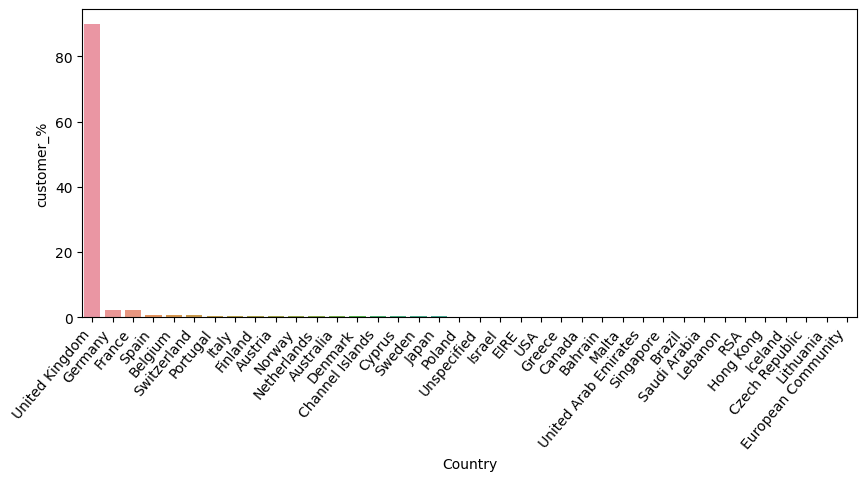

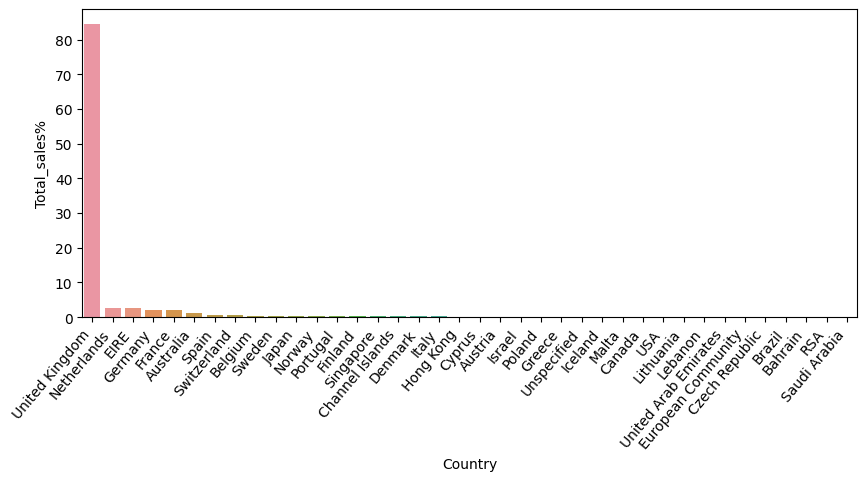

In [425]:
country_customer_df = country_customer_df.sort_values(by = "customer_%", ascending = False)
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax=sns.barplot(x=country_customer_df["Country"], y=country_customer_df['customer_%'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

country_df = country_df.sort_values(by = "Total_sales%", ascending = False)
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax=sns.barplot(x=country_df["Country"], y=country_df['Total_sales%'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

The United Kingdom not only has the most sales revenue, but also the most customers. Therefore, for the purpose of this analysis, I will be taking data corresponding to orders from the United Kingdom.

###Analyse on United Kingdom

In [426]:
uk_df = data_filtered[data_filtered.Country == "United Kingdom"]
uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellations,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


In [427]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479985 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      479985 non-null  object        
 1   StockCode      479985 non-null  object        
 2   Description    479985 non-null  object        
 3   Quantity       479985 non-null  int64         
 4   InvoiceDate    479985 non-null  datetime64[ns]
 5   UnitPrice      479985 non-null  float64       
 6   CustomerID     479985 non-null  int64         
 7   Country        479985 non-null  object        
 8   cancellations  479985 non-null  int64         
 9   Total_sales    479985 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 40.3+ MB


Checking Most popular products in United Kingdom

In [428]:
uk_product = uk_df.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
uk_product.head(5)

,StockCode,Description,Quantity
2653,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2112,23166,MEDIUM CERAMIC TOP STORAGE JAR,77036
3113,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49430
3601,85099B,JUMBO BAG RED RETROSPOT,44161
3622,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35430


In [429]:
#Find the unique number of InvoiceNo  per customer for analysis of United Kingdom 
groupby_customers = pd.DataFrame(uk_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.describe()

,InvoiceNo
count,3921.000000
mean,4.595511
std,23.013552
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1373.000000


In [430]:
#Find the unique number of products per Order
groupby_invoice = pd.DataFrame(uk_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of products per Order']
groupby_invoice.describe()

,Number of products per Order
count,18019.000000
mean,26.351129
std,48.882851
min,1.000000
25%,6.000000
50%,15.000000
75%,29.000000
max,1110.000000


The average number of orders per customer is 1 and average number of products per Order is 15

###RFM


For the analysis, we need to define a ‘analysis date’, which is the day on which we are conducting this analysis which I am taking as the next to last date in data and taking 1 year previous data from the selected date for recency calculation



In [431]:
analysis_date = uk_df["InvoiceDate"].max() + pd.DateOffset(1)
print("RFM Analysis Date :", analysis_date)

start_date = analysis_date - pd.DateOffset(days = 365)
print("Start Date when taking 1 year data for analysis :", start_date)

RFM Analysis Date : 2011-12-10 12:49:00
Start Date when taking 1 year data for analysis : 2010-12-10 12:49:00


In [432]:
# Aggregate data on a customer level to get RFM values
data_rfm = uk_df[uk_df.InvoiceDate >= start_date].groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (analysis_date - x.max()).days,
'InvoiceNo': 'count','Total_sales': 'sum'}).rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','Total_sales': 'Monetary'})
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,0,1,122746,1584018.84
1,12346,326,1,77183.60
2,12747,2,96,3837.45
3,12748,1,3899,30298.80
4,12749,4,199,4090.88


Text(0.5, 0, 'Attributes')

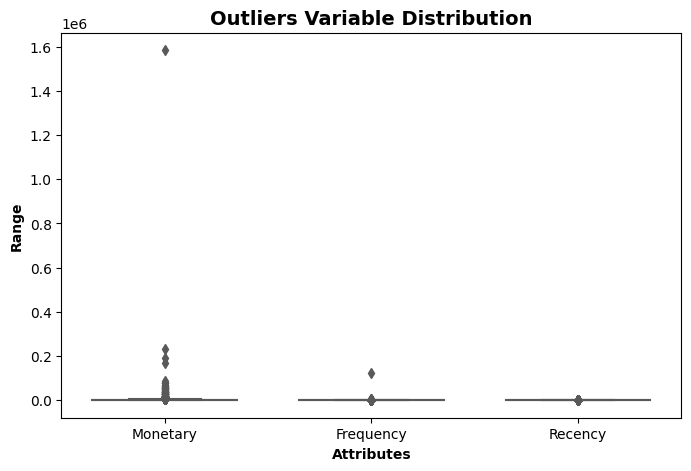

In [433]:
# Outlier Analysis of Total sales Frequency,Mometory and Recency

attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = data_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [434]:
# Removing (statistical) outliers for Monetory
Q1 = data_rfm.Monetary.quantile(0.05)
Q3 = data_rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
data_rfm = data_rfm[(data_rfm.Monetary >= Q1 - 1.5*IQR) & (data_rfm.Monetary<= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = data_rfm.Recency.quantile(0.05)
Q3 = data_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = data_rfm[(data_rfm.Recency >= Q1 - 1.5*IQR) & (data_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = data_rfm.Frequency.quantile(0.05)
Q3 = data_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
data_rfm = data_rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (data_rfm.Frequency <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

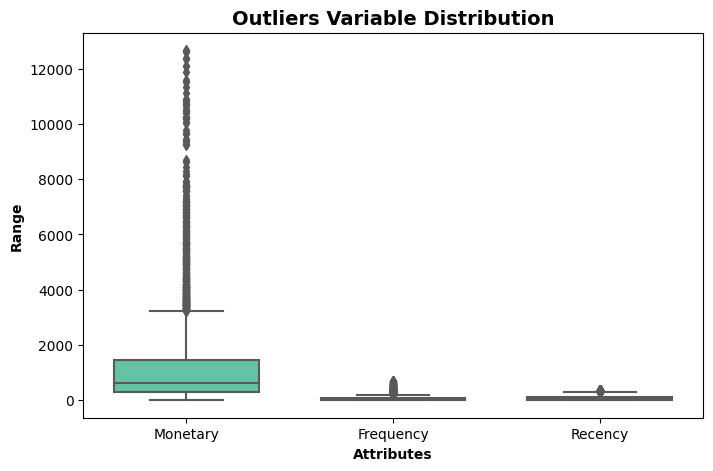

In [435]:
attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = data_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [436]:
### Getting individual RFM scores by using quantiles for each of the columns
data_rfm['R_score'] = pd.qcut(data_rfm['Recency'], 4, labels=False)
data_rfm['F_score'] = pd.qcut(data_rfm['Frequency'], 4, labels=False)
data_rfm['M_score'] = pd.qcut(data_rfm['Monetary'], 4, labels=False)

### Since a low Recency score means recent transactions and good customer, changine quantile values 
### so that low values rank highest ans vice versa
data_rfm['R_score'] = 3 - data_rfm['R_score']

data_rfm['RFM'] = data_rfm.R_score.map(str) + data_rfm.F_score.map(str) + data_rfm.M_score.map(str)

### Calculating Final RFM score
data_rfm["RFM_Score"] = data_rfm['R_score'] + data_rfm['F_score'] + data_rfm['M_score']
data_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM,RFM_Score
2,12747,2,96,3837.45,3,3,3,333,9
4,12749,4,199,4090.88,3,3,3,333,9
5,12820,3,59,942.34,3,2,2,322,7
6,12821,214,6,92.72,0,0,0,000,0
7,12822,71,46,948.88,1,2,2,122,5
8,12823,75,5,1759.50,1,0,3,103,4
9,12824,60,25,397.12,1,1,1,111,3
10,12826,3,82,1319.72,3,2,2,322,7
11,12827,6,25,430.15,3,1,1,311,5
12,12828,3,56,1018.71,3,2,2,322,7


The RFM_Score values will range from 0 (0+0+0) to 9 (3+3+3). Now grouping by the RFM scores to check the mean values of recency, frequency, and monetary corresponding to each score.

In [437]:
data_rfm.groupby("RFM_Score")[['Recency','Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
RFM_Score,,,
0,243.225309,7.836420,148.597284
1,170.097059,13.317647,223.291029
2,148.082569,19.511468,343.032892
3,89.830986,26.795775,423.167326
4,81.380463,36.884319,698.641979
5,58.386935,50.447236,894.432186
6,46.821622,71.797297,1293.853438
7,32.673367,107.545226,1699.047764
8,22.124611,173.535826,2657.528318


As expected, customers with the lowest RFM scores have the highest recency value and the lowest frequency and monetary value, and the vice-versa is true as well. This can be used to create manual segments based on RFM scores like Loyal Customers Group where Frequancy is High, High Spending Group where Monetary is High, Lost Customers Group where Recency is High etc.

Loyal and Good Customers which have High RFM values could be rewarded and heavy discounts are not needed for them. Customers with High Recency (and High Frequency and Monetary values) could be targeted aggresively with discounts so that they are not lost

##**5.Modeling : K - Means Clustering**

To properly find out segments on our RFM values, we can use a clustering algorithm like K-means.



                ----------------- Distribution Plots for R,F,M -------------------------------


<Axes: xlabel='Monetary', ylabel='Density'>

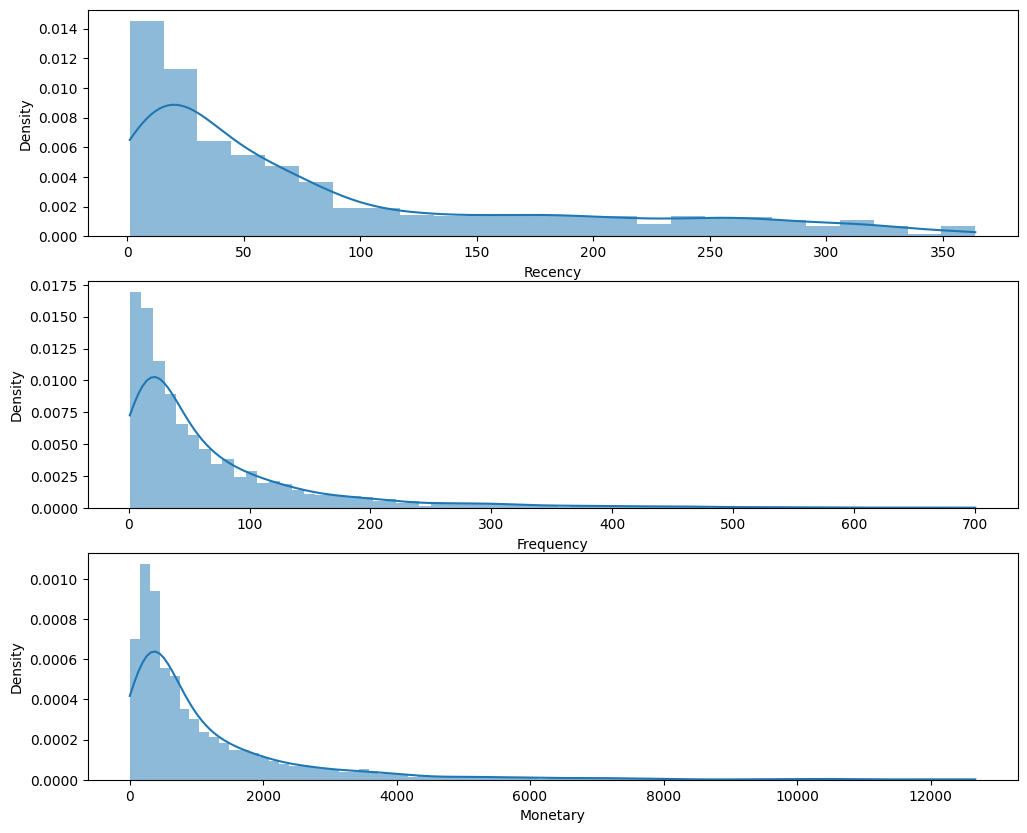

In [438]:
print("                ----------------- Distribution Plots for R,F,M -------------------------------")

# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1)
sns.histplot(data_rfm['Recency'], label="100% Equities", kde=True, stat="density", linewidth=0)

# Plot distribution of var2
plt.subplot(3, 1, 2)
sns.histplot(data_rfm['Frequency'], label="100% Equities", kde=True, stat="density", linewidth=0)


# Plot distribution of var3
plt.subplot(3, 1, 3)
sns.histplot(data_rfm['Monetary'], label="100% Equities", kde=True, stat="density", linewidth=0)

From the above figure, all the variables do not have a symmetrical distribution. All of them are skewed to the right. Since clustering algorithms require a normal distribution, normalization of the data is required.I am using Log transformation to deal with the skewness of data

                ----------------- Log Transformation Plots for R,F,M -------------------------------


<Axes: xlabel='log_M', ylabel='Density'>

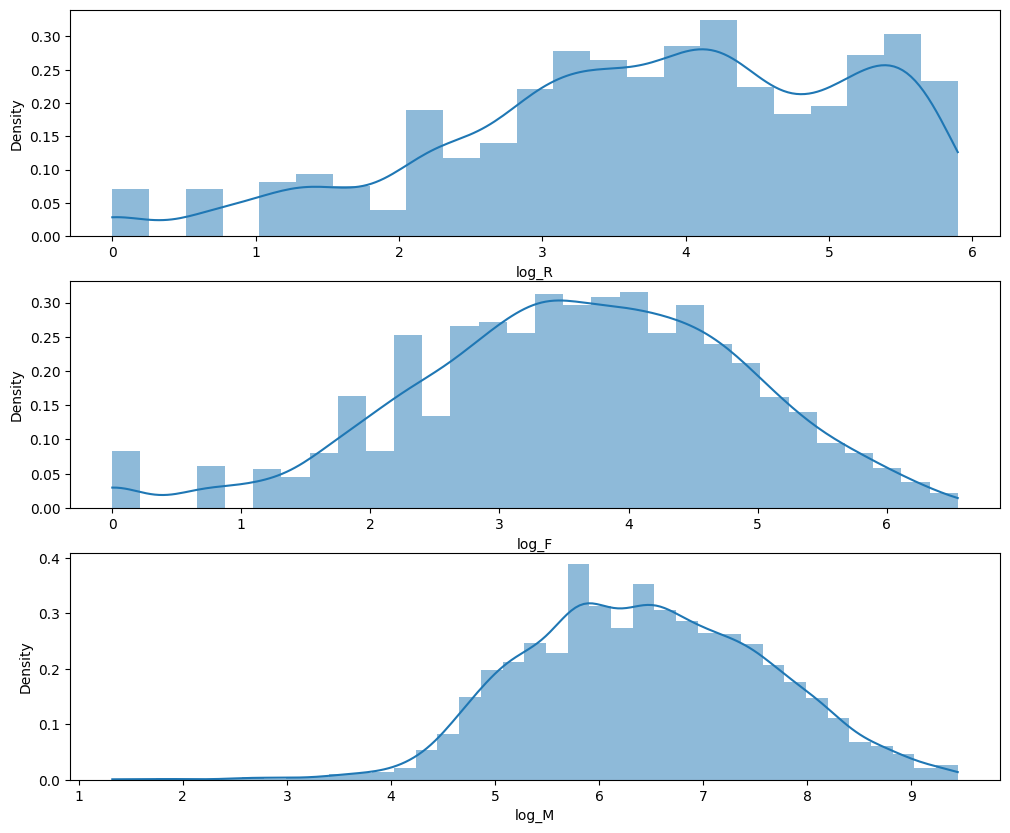

In [439]:
# Taking Log of columns
data_rfm["log_R"] = np.log(data_rfm.Recency)
data_rfm["log_F"] = np.log(data_rfm.Frequency)
data_rfm["log_M"] = np.log(data_rfm.Monetary)

# Checking the distribution of Recency, Frequency and Monetary variables after log transformation
print("                ----------------- Log Transformation Plots for R,F,M -------------------------------")
plt.figure(figsize=(12,10))

# sns.distplot(data_rfm['log_R'])
plt.subplot(3, 1, 1)
sns.histplot(data_rfm['log_R'], label="100% Equities", kde=True, stat="density", linewidth=0)

# sns.distplot(data_rfm['log_F'])
plt.subplot(3, 1, 2)
sns.histplot(data_rfm['log_F'], label="100% Equities", kde=True, stat="density", linewidth=0)

# sns.distplot(data_rfm['log_M'])
plt.subplot(3, 1, 3)
sns.histplot(data_rfm['log_M'], label="100% Equities", kde=True, stat="density", linewidth=0)


To Find optimal number of clusters, I will use Elbow method where errors are plotted against K (cluster value) to identify optimal number of clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

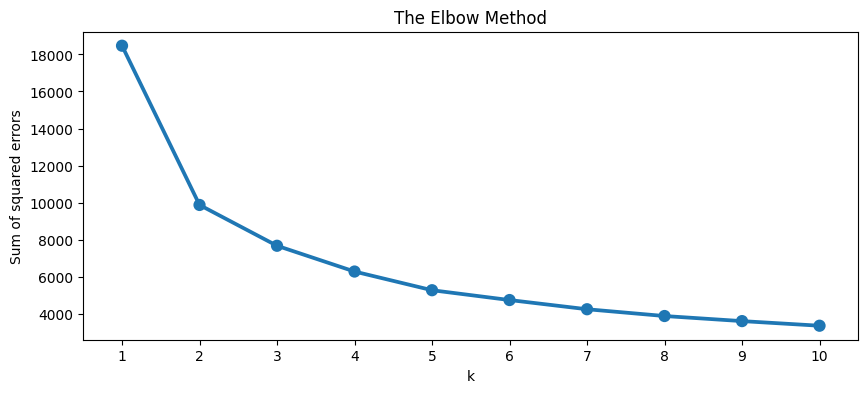

In [440]:
from sklearn.cluster import KMeans
### Features Used in training K Means - Log Transformed Recency, Frequency and Monetary values
data_norm = data_rfm[["log_R", "log_F", "log_M"]]

sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 11):
  
# Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_norm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
    
# Plotting the elbow plot
plt.figure(figsize=(10,4))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

From the above plot, we can see that the optimal number of clusters can be taken as 3. Now I am building the K Means model using 3 clusters.



In [441]:
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state=1)
kmeans.fit(data_norm)
# assign the label
data_rfm["cluster"] = kmeans.predict(data_norm)


data_rfm.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM,RFM_Score,log_R,log_F,log_M,cluster
2,12747,2,96,3837.45,3,3,3,333,9,0.693147,4.564348,8.252563,0
4,12749,4,199,4090.88,3,3,3,333,9,1.386294,5.293305,8.316515,0
5,12820,3,59,942.34,3,2,2,322,7,1.098612,4.077537,6.848366,0
6,12821,214,6,92.72,0,0,0,000,0,5.365976,1.791759,4.529584,2
7,12822,71,46,948.88,1,2,2,122,5,4.262680,3.828641,6.855282,1


Checking Mean RFM values in different clusters to understand cluster properties



In [442]:
data_rfm.groupby(["cluster"])[['Recency','Frequency', 'Monetary']].mean()


,Recency,Frequency,Monetary
cluster,,,
0,10.451467,172.112867,2804.015497
1,71.709827,69.920319,1135.916111
2,156.862193,14.398268,285.756884


This is the mean value of RFM in different clusters. Clearly there is correlation between Frequency and Monetary - how their value varies between clusters. This can also be seen in the heat map of these three features shown below. Low value of recency means recent transactions while high frequency means more frequent transactions and high Monetary value means high spending in transactions

<Axes: >

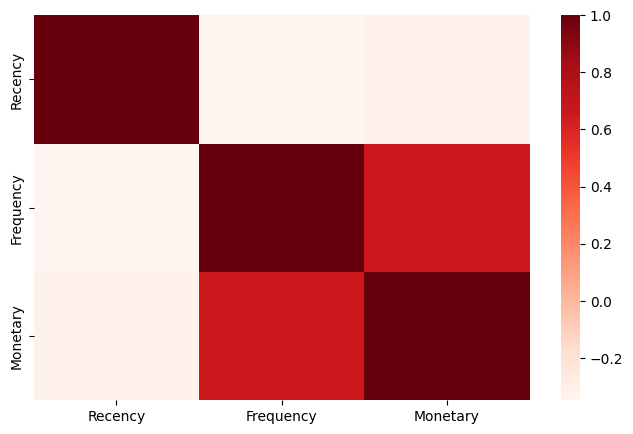

In [443]:
sns.heatmap(data_rfm[['Recency','Frequency', 'Monetary']].corr(),cmap="Reds")

There is a negative correlation between Recency - Frequency and Recency - Monetary, but there is a positive correlation between Frequency - Monetary which can also be seen in the variation of mean values in clusters

<Axes: xlabel='cluster', ylabel='Monetary'>

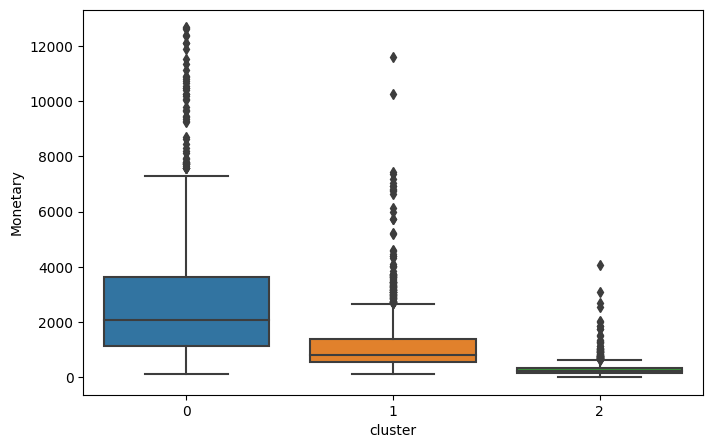

In [444]:
# Box plot to visualize Cluster vs Monetory

sns.boxplot(x='cluster', y='Monetary', data=data_rfm)

<Axes: xlabel='cluster', ylabel='Frequency'>

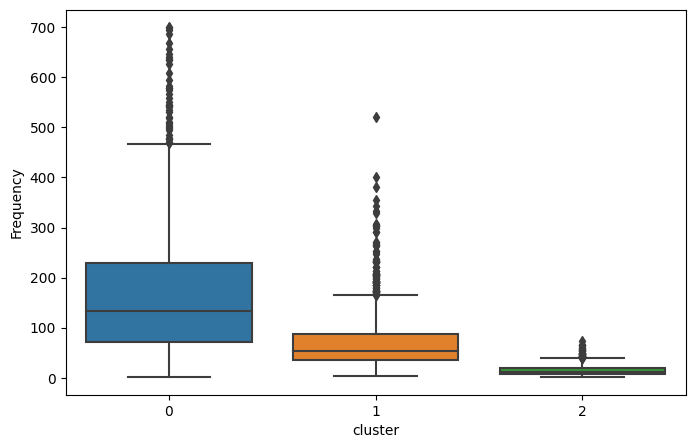

In [445]:
# Box plot to visualize Cluster  vs Frequency

sns.boxplot(x='cluster', y='Frequency', data=data_rfm)

<Axes: xlabel='cluster', ylabel='Recency'>

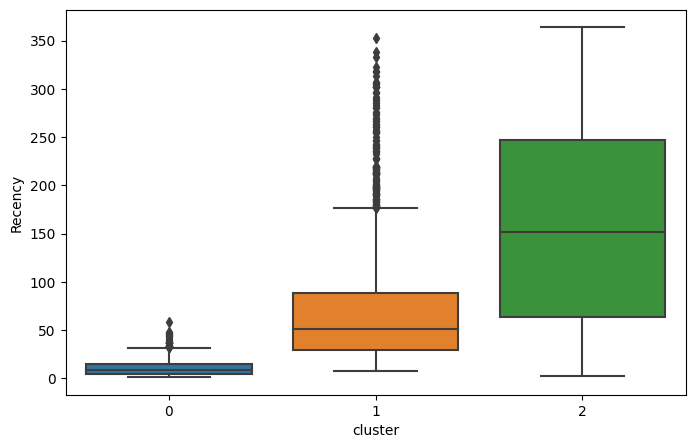

In [446]:
# Box plot to visualize Cluster  vs Recency

sns.boxplot(x='cluster', y='Recency', data=data_rfm)


Text(0, 0.5, 'Monetary')

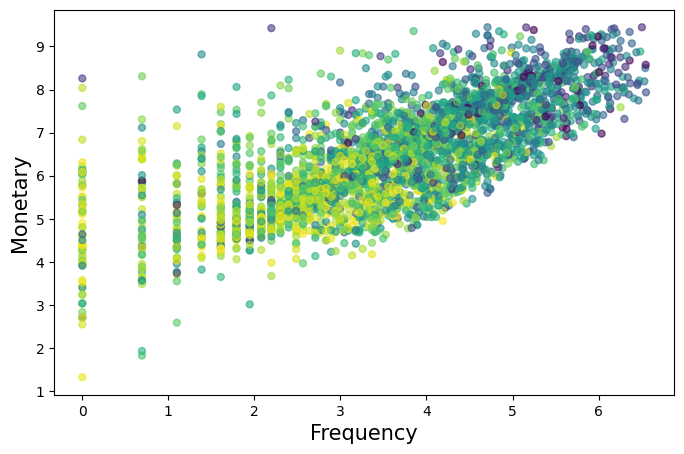

In [448]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to dataframe
data_rfm['cen_x'] = data_rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data_rfm['cen_y'] = data_rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})



# Plot clusters
plt.figure(figsize=(8,5))
plt.scatter(data_rfm.log_F, data_rfm.log_M, c=data_rfm.log_R, alpha = 0.6, s=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

This plot clearly indicates that green cluster is high value customer cohort (Cluster 1) and blue cluster is Lost/low value customer cohort (Cluster 2) while yellow cluster is average value customer cohort (Cluster 0)

High Value :- Frequent spending customers with high monetary transactions and had transacted recently

Low Value/ Lost :- Customers with least frequency and monetary spending and made purchase long time ago. These customers might be lost from the customer base.

Average Value :- Customers who made their transactions some time ago with less frequency and monetary value. These customers could become high risk and we could aggressively market towards them with great deals so we don't lose them forever.



##***6.Hierarchical Clustering***
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

1.Divisive

2.Agglomerative.

**Single Linkage:**
In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.



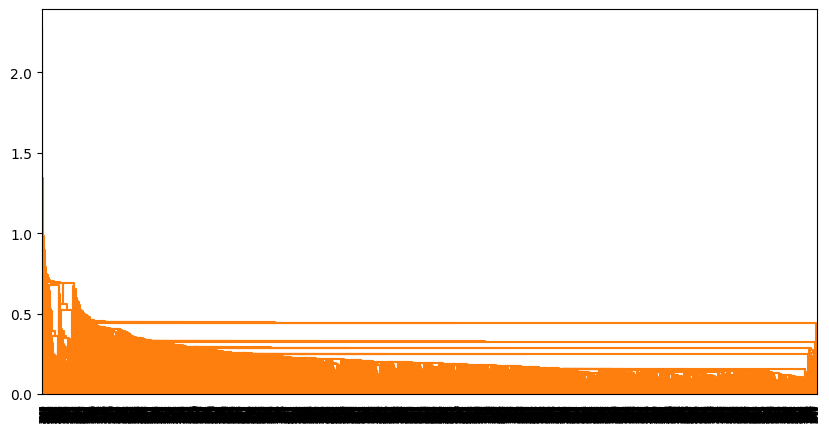

In [450]:
# Single linkage: 
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,5))
mergings = linkage(data_norm, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage**:
In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

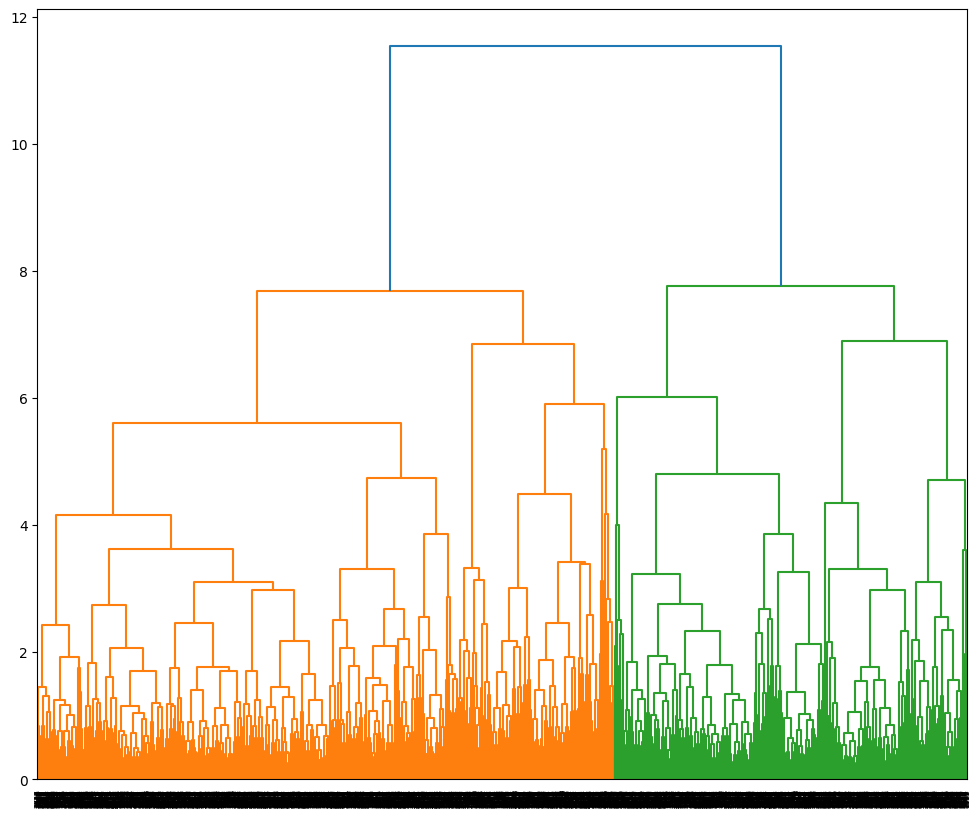

In [371]:
# Complete linkage
plt.figure(figsize=(12,10))
mergings = linkage(data_norm, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Average Linkage**:
In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

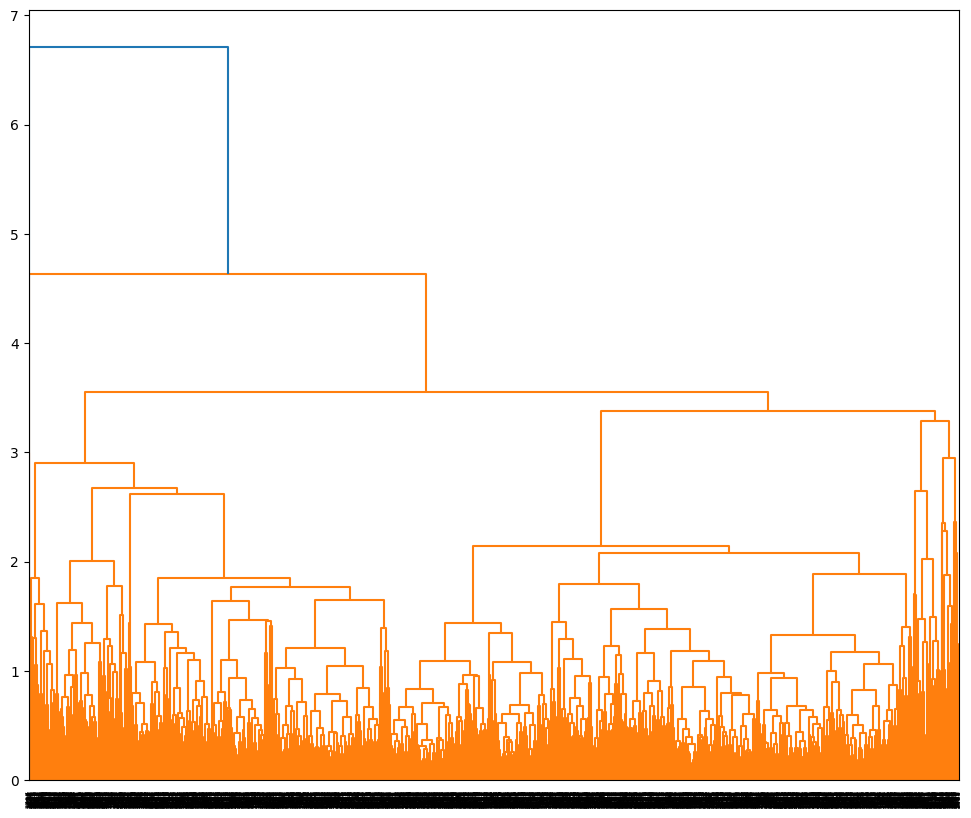

In [372]:
# Average linkage
plt.figure(figsize=(12,10))
mergings = linkage(data_norm, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()


###Cutting the Dendrogram based on K

In [373]:
# 3 clusters
# import required libraries for dataframe and visualization
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

###Cluster Labels

In [374]:
# Assign cluster labels

data_rfm['Cluster_Labels'] = cluster_labels
data_rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM,RFM_Score,log_R,log_F,log_M,cluster,cen_x,cen_y,Cluster_Labels
2,12747,2,96,3837.45,3,3,3,333,9,0.693147,4.564348,8.252563,0,1.945635,4.811902,0
4,12749,4,199,4090.88,3,3,3,333,9,1.386294,5.293305,8.316515,0,1.945635,4.811902,0
5,12820,3,59,942.34,3,2,2,322,7,1.098612,4.077537,6.848366,0,1.945635,4.811902,0
6,12821,214,6,92.72,0,0,0,000,0,5.365976,1.791759,4.529584,2,4.714565,2.356827,0
7,12822,71,46,948.88,1,2,2,122,5,4.262680,3.828641,6.855282,1,3.957378,4.028665,0


<Axes: xlabel='Cluster_Labels', ylabel='Monetary'>

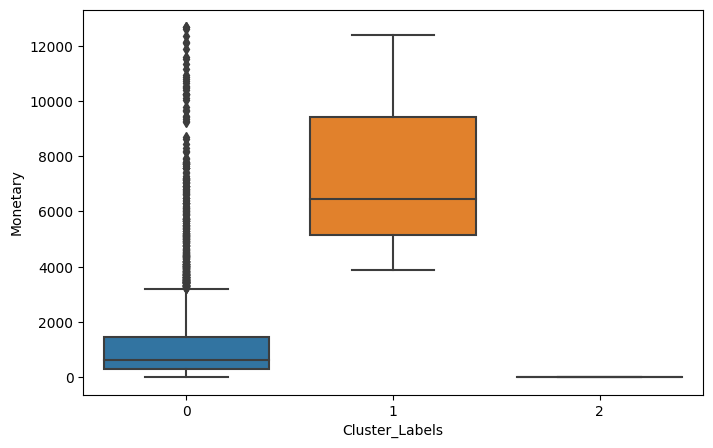

In [375]:
# Plot Cluster Id vs Monetory
sns.boxplot(x='Cluster_Labels', y='Monetary', data=data_rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Recency'>

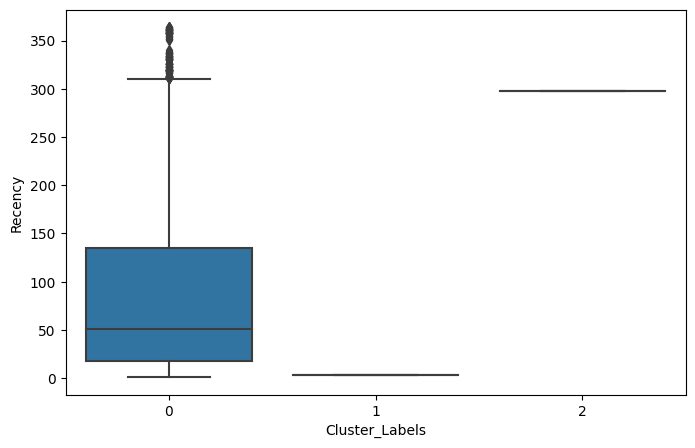

In [376]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=data_rfm)

<Axes: xlabel='Cluster_Labels', ylabel='Frequency'>

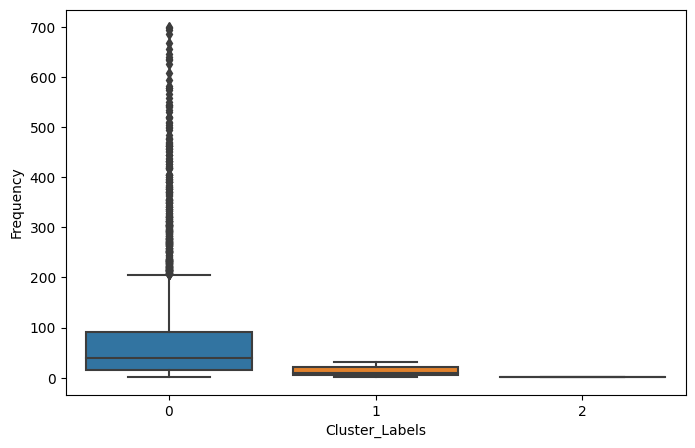

In [377]:
# Plot Cluster Id vs Frequency
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster_Labels', y='Frequency', data=data_rfm)

Step 5 : Final Analysis
Inference:
K-Means Clustering with 3 Cluster Ids

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster Id 1 are frequent buyers.

Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

Hierarchical Clustering with 3 Cluster Labels

Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
Customers with Cluster_Labels 2 are frequent buyers.
Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

##***7.Conclusion***

We got optimal number of clusters=2 with ghelp of Elbow method, Silhouette score.
Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2414 customers.
Cluster 1 has low recency rate but they are frequent buyers and spends very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business.
With this, we are done.Also, we can use more robust analysis for the clustering, using not only RFM but other metrics such as demographics or product features.